In [2]:
from geoarray import GeoArray
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.signal import savgol_filter
from scipy.interpolate import splev, splrep

In [3]:
# importing ISOFIT
from isofit.utils import surface_model
from isofit.core.forward import ForwardModel
from isofit.configs.configs import create_new_config
from isofit.inversion.inverse import Inversion
from isofit.core.fileio import IO

In [4]:
import tkinter
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [5]:
"""
v2m2: India campaign, fourth draft calibration, campaign start, point-spread
      function (PSF) correction, new multiple endmember spectral mixture analysis
      (MESMA), new wavelengths, new RCCs, new methane (CH4) signatures for data
      collected from 20151218 through 20160308.
        
"""
# Data Gathered over Kurnool, India
data = GeoArray('C:\\Users\\vpatro\\Desktop\\ang20160126\\ang20160126t055327_corr_v2m2_img')
data_2015_Chilika = GeoArray('C:\\Users\\vpatro\\Desktop\\ang20151228\\ang20151228t060124_corr_v2m2_img')

DATA VISUALIZATION

DATA VISUALIZATION ACROSS ENTIRE VSWIR SPECTRUM

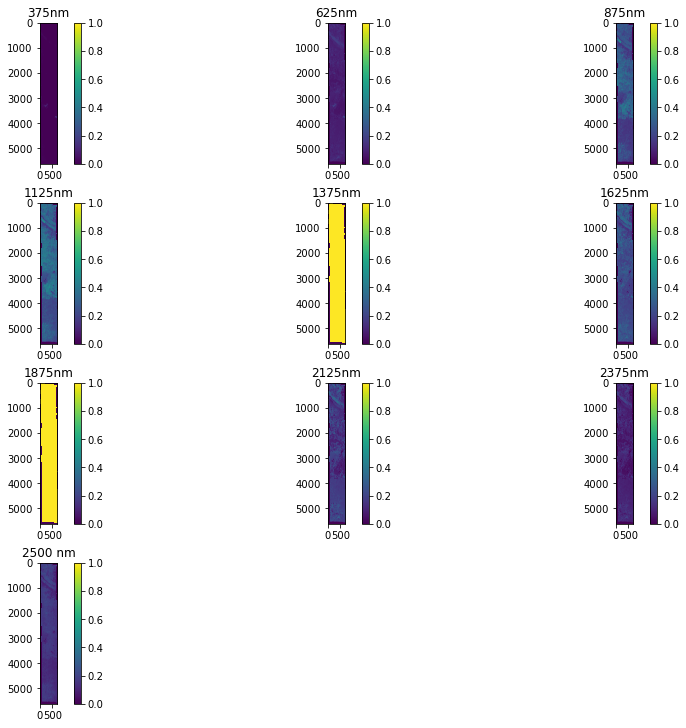

In [6]:
# Visualization of VSWIR -- entire image
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (12,10), constrained_layout = True)
gs = fig.add_gridspec()
wavelength = 375
channel = 0
for i in range(4):
    if i == 3:
        im = axs[i,0].imshow(data[:,:, 424])
        axs[i,0].set_title('2500 nm')
        plt.colorbar(im, ax = axs[i,0])
        im.set_clim(0,1)
        break
    for j in range(3):
        im = axs[i,j].imshow(data[:,:, channel])
        axs[i,j].set_title(str(wavelength) + 'nm')
        plt.colorbar(im, ax = axs[i,j])
        im.set_clim(0,1)
        wavelength += 250
        channel += 50
fig.delaxes(axs[3,1])
fig.delaxes(axs[3,2])
plt.show()

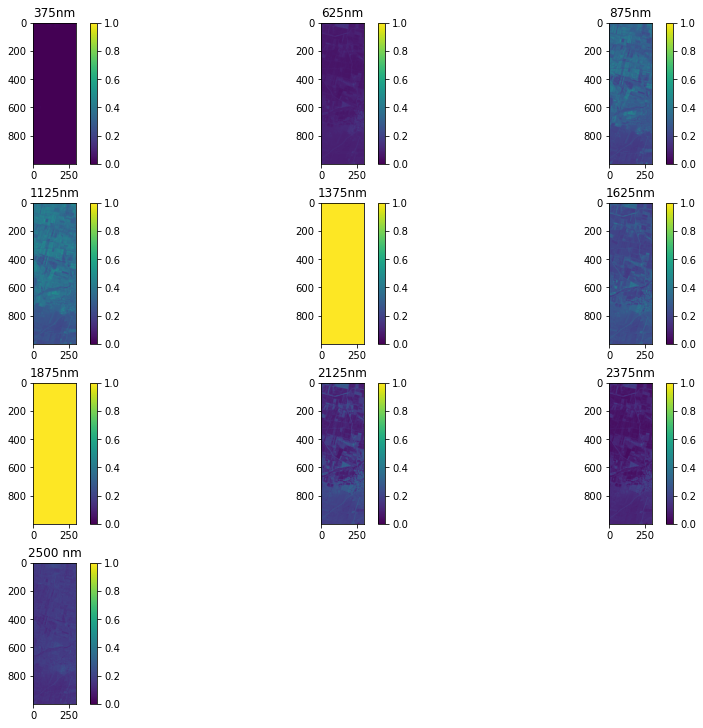

In [7]:
# Visualization of VSWIR -- zoomed in
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (12,10), constrained_layout = True)
gs = fig.add_gridspec()
wavelength = 375
channel = 0
for i in range(4):
    if i == 3:
        im = axs[i,0].imshow(data[2000:3000,100:400, 424])
        axs[i,0].set_title('2500 nm')
        plt.colorbar(im, ax = axs[i,0])
        im.set_clim(0,1)
        break
    for j in range(3):
        im = axs[i,j].imshow(data[2000:3000,100:400, channel])
        axs[i,j].set_title(str(wavelength) + 'nm')
        plt.colorbar(im, ax = axs[i,j])
        im.set_clim(0,1)
        wavelength += 250
        channel += 50
fig.delaxes(axs[3,1])
fig.delaxes(axs[3,2])
plt.show()

VISUALIZATION ACROSS VISIBLE LIGHT SPECTRUM

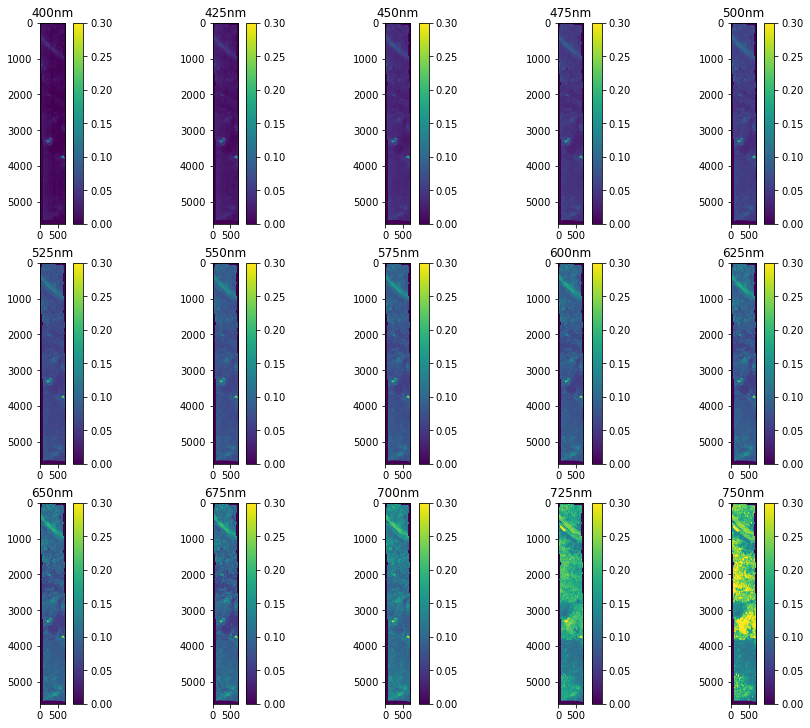

In [8]:
# Visualization of Visible Light spectrum -- entire image
fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize = (12,10), constrained_layout = True)
gs = fig.add_gridspec()
wavelength = 400
channel = 5
for i in range(3):
    for j in range(5):
        im = axs[i,j].imshow(data[:,:, channel])
        axs[i,j].set_title(str(wavelength) + 'nm')
        plt.colorbar(im, ax = axs[i,j])
        im.set_clim(0,0.3)
        wavelength += 25
        channel += 5
plt.show()

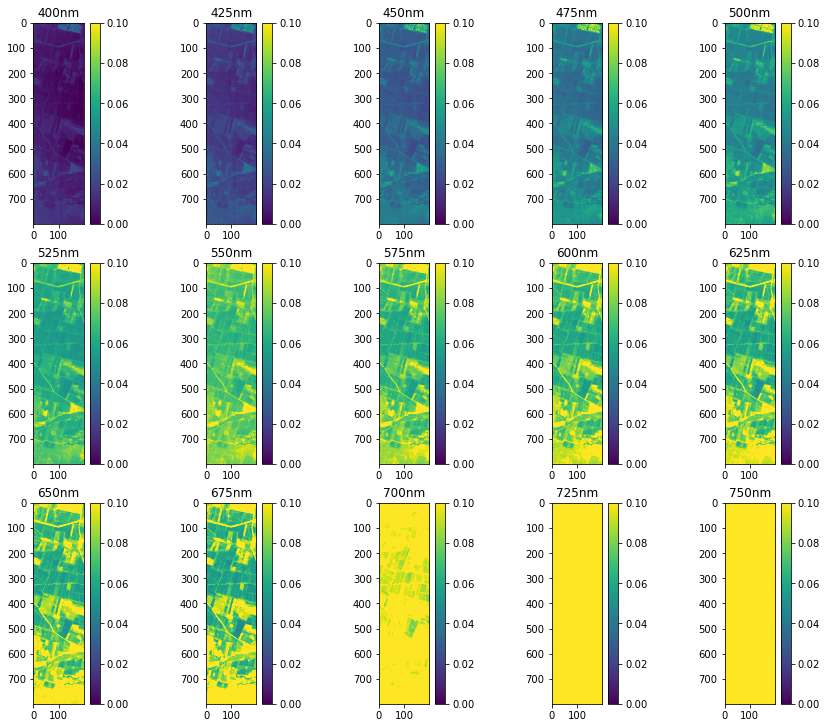

In [9]:
# Visualization of Visual Light spectrum -- zoomed in
fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize = (12,10), constrained_layout = True)
gs = fig.add_gridspec()
wavelength = 400
channel = 5
for i in range(3):
    for j in range(5):
        im = axs[i,j].imshow(data[2000:2800,100:300, channel])
        axs[i,j].set_title(str(wavelength) + 'nm')
        plt.colorbar(im, ax = axs[i,j])
        im.set_clim(0,0.1)
        wavelength += 25
        channel += 5
plt.show()

VISUALIZATION OF A ZOOMED IN PORTION OF PREVIOUS IMAGE

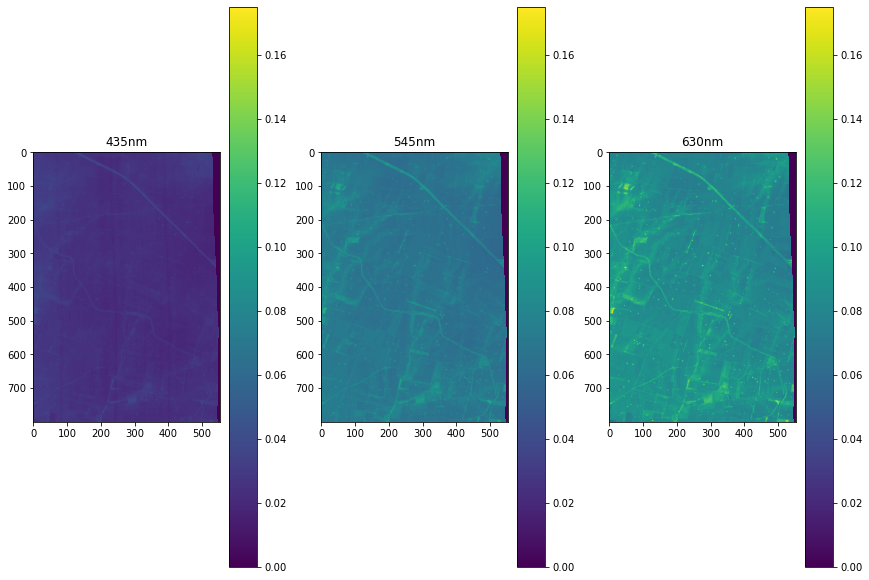

In [10]:
# Visualization at blue, green, red wavelengths
# Kurnool, India
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12,10), constrained_layout = True)
gs = fig.add_gridspec()
wavelength = [435, 545, 630]
channel = [12,34, 52]
for i in range(3):
    im = axs[i].imshow(data[4000:4800,150:, channel[i]])
    axs[i].set_title(str(wavelength[i]) + 'nm')
    plt.colorbar(im, ax = axs[i])
    im.set_clim(0,0.175)
plt.show()

In [15]:
def remove_bad_bands(spectra_list : list):
    # removes bad bands

    for spectra in spectra_list:
        # sets the indices of all bad bands to np.nan
        wavelengths = list(range(425))
        indices = list(range(425))
        for i in wavelengths:
            if i > 181 and i < 224:
                wavelengths[i] = np.nan
            if i > 275 and i < 329:
                wavelengths[i] = np.nan
            if i > 418:
                wavelengths[i] = np.nan

        bad_indices = []
        for i in range(len(wavelengths)):
            if math.isnan(wavelengths[i]):
                bad_indices.append(int(indices[i]))
            
        spectra[bad_indices] = np.nan
        

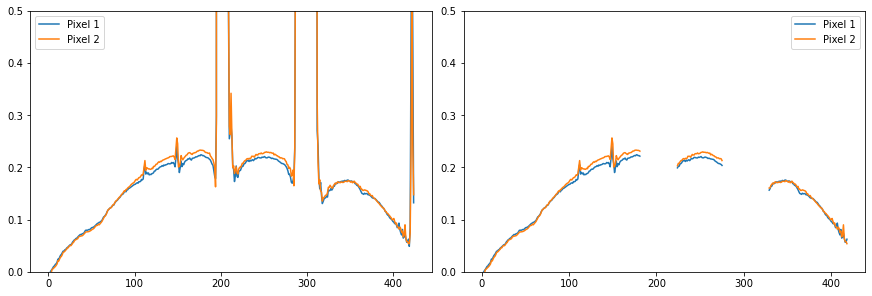

In [16]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4), constrained_layout = True)
gs = fig.add_gridspec()
spectra_1 = data[4500,250,:].copy()
spectra_2 = data[4500,600,:].copy()
axs[0].plot(spectra_1, label = 'Pixel 1')
axs[0].plot(spectra_2,label = 'Pixel 2')
axs[0].set_ylim([0,0.5])
axs[0].legend()
#axs[0].set_title('Comparison of Surface Reflectances from the Same Line of Image -- Soil')
remove_bad_bands([spectra_1, spectra_2])
axs[1].plot(spectra_1, label = 'Pixel 1')
axs[1].plot(spectra_2,label = 'Pixel 2')
axs[1].set_ylim([0,0.5])
axs[1].legend()
#axs[1].set_title('Comparison of Surface Reflectances from the Same Line of Image -- Soil')

PRE_PROCESSING STEPS

SAVISTKY_GOLAY FILTER

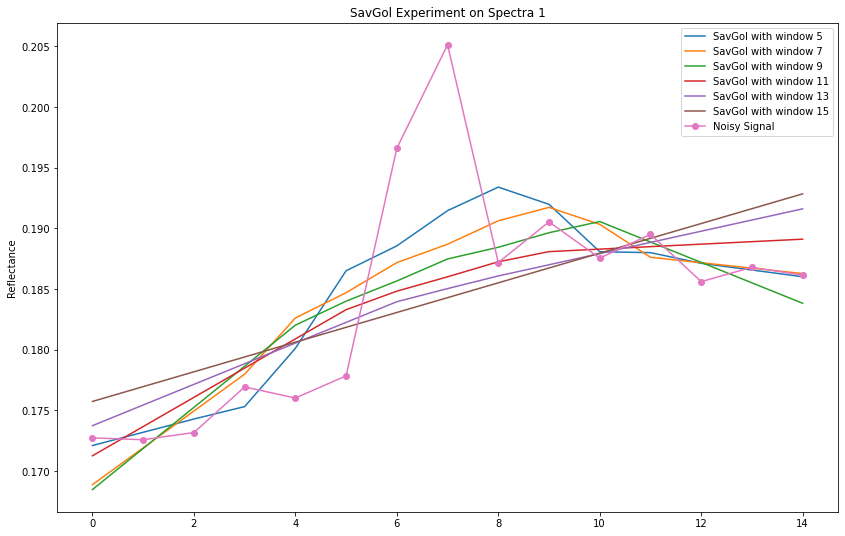

In [17]:
# Savitsky-Golay Experiment on Spectra 1
plt.figure(figsize = (14,9))
shortened_array = spectra_1[105:120].copy() # deepcopy so no reference issues any longer 
#print('spectra_1', spectra_1[105:120])
for i in range(5,17,2):
    y_filtered = savgol_filter(shortened_array,i,1)
    plt.plot(y_filtered, label = 'SavGol with window ' + str(i))
plt.plot(shortened_array, label = 'Noisy Signal', marker = 'o')
plt.legend()
plt.ylabel('Reflectance')
plt.title('SavGol Experiment on Spectra 1')

best_fit_1 = savgol_filter(shortened_array,11,1)
#print('savgol', best_fit); print('spectra_1', spectra_1[105:120])

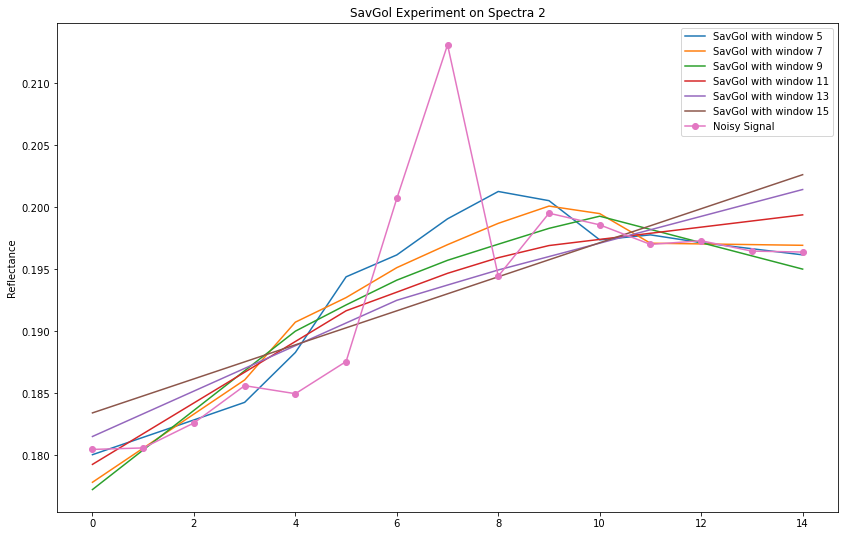

In [18]:
# Savitsky-Golay Experiment on Spectra 2
plt.figure(figsize = (14,9))
shortened_array_2 = spectra_2[105:120].copy()
for i in range(5,17,2):
    y_filtered_2 = savgol_filter(shortened_array_2,i,1)
    plt.plot(y_filtered_2, label = 'SavGol with window ' + str(i))
plt.plot(shortened_array_2, label = 'Noisy Signal', marker = 'o')
plt.legend()
plt.ylabel('Reflectance')
plt.title('SavGol Experiment on Spectra 2')

best_fit_2 = savgol_filter(shortened_array_2,11,1)
#print('savgol', best_fit); print('spectra_1', spectra_1[105:120])

In [19]:
spectra_1 = data[4500,250,:]
spectra_2 = data[4500,600,:]
old_array_1 = data[4500,250,:]
old_array_2 = data[4500,600,:]
#print('original_data before change to spectra 1', old_array[105:120])
spectra_1[105:120] = best_fit_1.copy()
spectra_2[105:120] = best_fit_2.copy()
#print('savgol', best_fit_1)
#print('spectra_1', spectra_1[105:120])
#print('original_data', old_array[105:120])

In [20]:
assert(spectra_1[105:120].all() == best_fit_1.all())
assert(spectra_2[105:120].all() == best_fit_2.all())
remove_bad_bands([spectra_1, spectra_2, old_array_1, old_array_2])

Text(0.5, 1.0, 'Comparison of Two Surface Reflectances from the Same Line of an Image -- Soil')

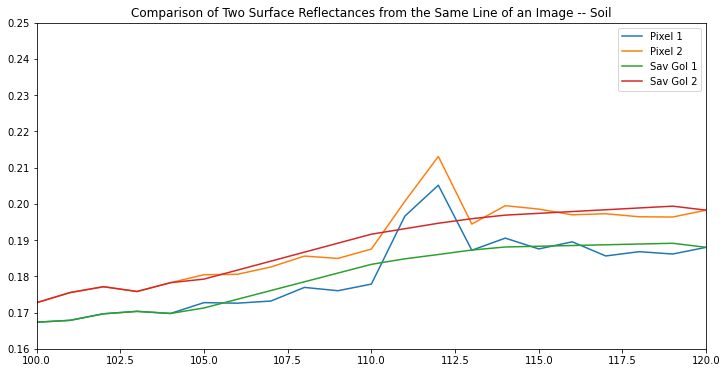

In [21]:
plt.figure(figsize = (12,6))
plt.plot(old_array_1, label = 'Pixel 1')
plt.plot(old_array_2,label = 'Pixel 2')
plt.plot(spectra_1, label = 'Sav Gol 1')
plt.plot(spectra_2, label = 'Sav Gol 2')
plt.ylim(0.16,0.25)
plt.xlim(100,120)
plt.legend()
plt.title('Comparison of Two Surface Reflectances from the Same Line of an Image -- Soil')

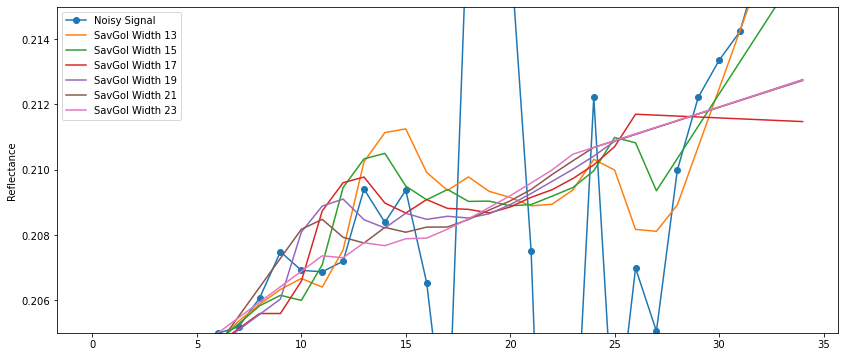

In [23]:
# second noise peak for savgol smoothening

noise = spectra_1[130:165].copy()
plt.figure(figsize = (14,6))
plt.plot(noise, label = 'Noisy Signal', marker = 'o')
for i in range(13,24,2):
    y_filtered = savgol_filter(noise, i, 1)
    plt.plot(y_filtered, label = 'SavGol Width ' + str(i))
plt.legend()
plt.ylabel('Reflectance')
plt.ylim(0.205, 0.215)

best_fit = savgol_filter(noise, 21, 1)

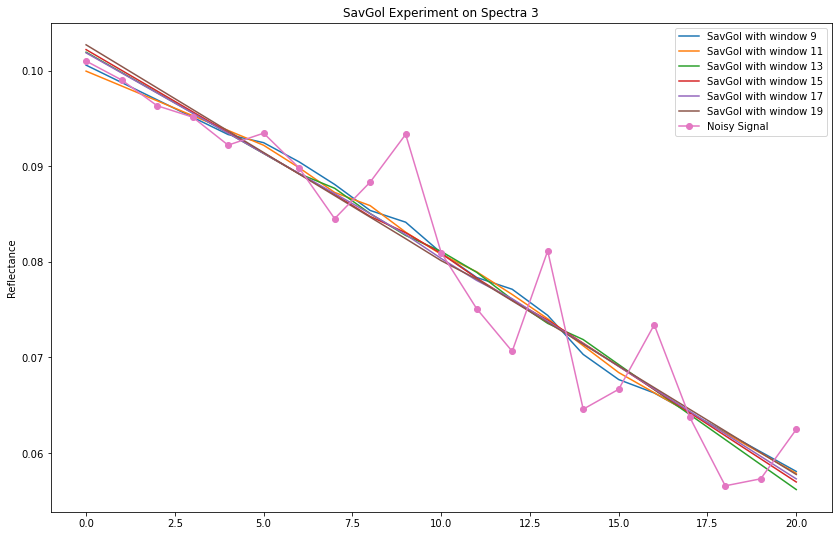

In [36]:
# Savitsky-Golay Experiment on Jagged region near end bands
plt.figure(figsize = (14,9))
shortened_array_3 = spectra_1[398:419].copy()
for i in range(9,21,2):
    y_filtered_3 = savgol_filter(shortened_array_3,i,1)
    plt.plot(y_filtered_3, label = 'SavGol with window ' + str(i))
plt.plot(shortened_array_3, label = 'Noisy Signal', marker = 'o')
plt.legend()
plt.ylabel('Reflectance')
plt.title('SavGol Experiment on Spectra 3')

best_fit_3 = savgol_filter(shortened_array_3,11,1)


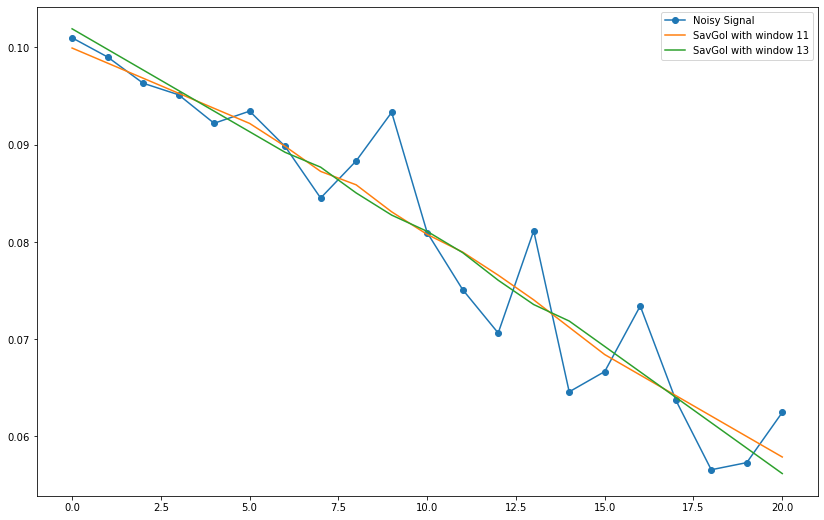

In [37]:
plt.figure(figsize = (14,9))
shortened_array_3 = spectra_1[398:419].copy()
plt.plot(shortened_array_3, label = 'Noisy Signal', marker = 'o')
y_filtered_3 = savgol_filter(shortened_array_3,11,1)
plt.plot(y_filtered_3, label = 'SavGol with window 11')
y_filtered_3 = savgol_filter(shortened_array_3,13,1)
plt.plot(y_filtered_3, label = 'SavGol with window 13')
plt.legend()




In [38]:
# SavGol smoothening function

def savgol_smoothening(spectra_list:list):
    for spectra in spectra_list:
        noise_peak_1 = spectra[105:120].copy()
        noise_peak_2 = spectra[140:165].copy()
        jagged_peak = spectra[398:419].copy()
        spectra[105:120] = savgol_filter(noise_peak_1, 11,1)
        spectra[140:165] = savgol_filter(noise_peak_2, 21, 1)
        spectra[398:419] = savgol_filter(jagged_peak, 11, 1)
        
                       

Text(0.5, 1.0, 'With SavGol Smoothening')

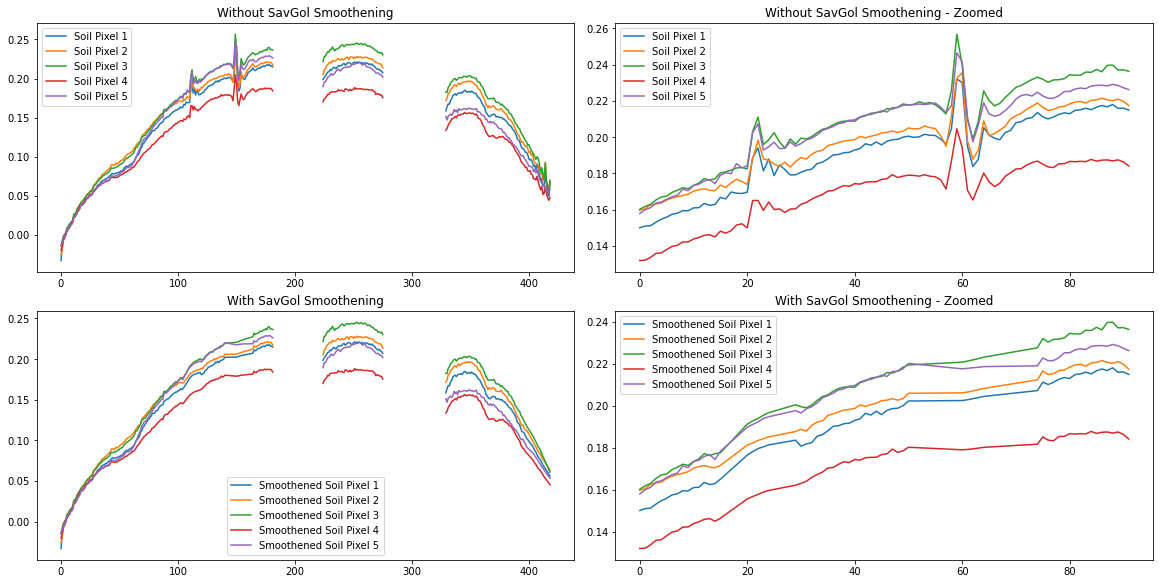

In [39]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (16,8), constrained_layout = True)
gs = fig.add_gridspec()
for i in range(5):
    # Generate random pixel within pre-designated area
    spectra = data[np.random.randint(4000,4799),np.random.randint(150,650),:].copy()
    remove_bad_bands([spectra])
    axs[0, 0].plot(spectra, label = 'Soil Pixel ' + str(i+1))
    axs[0, 1].plot(spectra[90:190], label = 'Soil Pixel ' + str(i+1))
    savgol_smoothening([spectra])
    axs[1, 0].plot(spectra, label = 'Smoothened Soil Pixel ' + str(i+1))
    axs[1, 1].plot(spectra[90:190], label = 'Smoothened Soil Pixel ' + str(i+1))
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
axs[0,1].set_title('Without SavGol Smoothening - Zoomed')
axs[0,0].set_title('Without SavGol Smoothening')
axs[1,1].set_title('With SavGol Smoothening - Zoomed')
axs[1,0].set_title('With SavGol Smoothening')

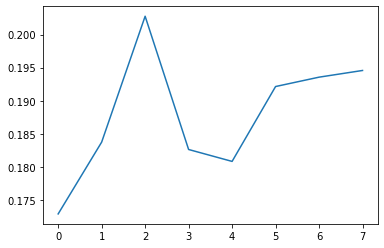

In [712]:
# Bad bands occur in 
# [191,215]
# [281:319]
# [419,)

smoothened_close_up = spectra_1.copy()
savgol_smoothening([smoothened_close_up])
plt.plot(smoothened_close_up[216:224])

In [713]:
# must make this a function somehow -- 

def run_ISOFIT(input_reflectance: np.array) -> np.array:
    
    # Surface model
    surface_model("C:\\Users\\vpatro\\Desktop\\isofit_vp\\examples\\20171108_Pasadena\\configs\\ang20171108t184227_surface.json")

    # Creating ISOFIT objects
    config = create_new_config("C:\\Users\\vpatro\\Desktop\\isofit_vp\\examples\\20171108_Pasadena\\configs\\ang20171108t184227_beckmanlawn.json")
    fm = ForwardModel(config)
    inv = Inversion(config, fm)
    io = IO(config, fm)
    io.get_components_at_index(0, 0)
    geom = io.current_input_data.geom # alternately, call via geom = Geometry()...this won't have data from the above config file
    meas = io.current_input_data.meas  # a numpy  array

    # adding in Radiative Transfer Parameters
    #x = np.loadtxt("C:\\Users\\vpatro\\Desktop\\avirisng_input.txt")
    input_reflectance = np.append(input_reflectance,1.75)
    input_reflectance = np.append(input_reflectance,0.05)
    
    radiance_measurement = fm.calc_rdn(input_reflectance,geom)
    OE_estimation = inv.invert(radiance_measurement, geom)[0]
    
    return OE_estimation

In [714]:
# remove radiative transfer parameters

def remove_RT_parameters(spectra) -> np.array:
    spectra[425] = np.nan
    spectra[426] = np.nan
    return spectra

In [715]:
# Sample pixel for experiment - Kurnool India
avirisng_input = data[4600,500,:].copy()
smoothened_av_input = avirisng_input.copy()
savgol_smoothening([smoothened_av_input])
measurement = data[4600,500,:].copy()
remove_bad_bands([measurement])

In [716]:
OE_unsmoothened_estimations = [[], [], [], [], []]
OE_smoothened_estimations = [[], [], [], [], []]

for i in range(5):
    OE_reflectance = run_ISOFIT(avirisng_input)
    OE_reflectance = remove_RT_parameters(OE_reflectance)
    OE_unsmoothened_estimations[i] = OE_reflectance
    
    OE_reflectance = run_ISOFIT(smoothened_av_input)
    OE_reflectance = remove_RT_parameters(OE_reflectance)
    OE_smoothened_estimations[i] = OE_reflectance

OE_unsmoothened_estimations = np.array(OE_unsmoothened_estimations)
OE_smoothened_estimations = np.array(OE_smoothened_estimations)

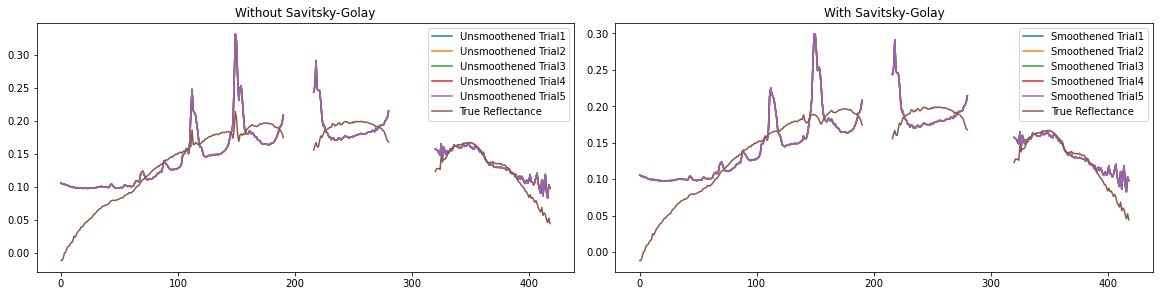

In [717]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4), constrained_layout = True)
gs = fig.add_gridspec()

for i in range(OE_unsmoothened_estimations.shape[0]):
    us_column = OE_unsmoothened_estimations[i,:].copy()
    s_column = OE_smoothened_estimations[i,:].copy()
    us_column = remove_RT_parameters(us_column)
    s_column = remove_RT_parameters(s_column)
    remove_bad_bands([us_column, s_column])
    axs[0].plot(us_column, label = 'Unsmoothened Trial' + str(i+1))
    axs[1].plot(s_column, label = 'Smoothened Trial' + str(i+1))
axs[0].plot(measurement, label = 'True Reflectance')
savgol_smoothening([measurement])
axs[1].plot(measurement, label = 'True Reflectance')
axs[0].set_title('Without Savitsky-Golay')
axs[1].set_title('With Savitsky-Golay')
axs[0].legend()
axs[1].legend()


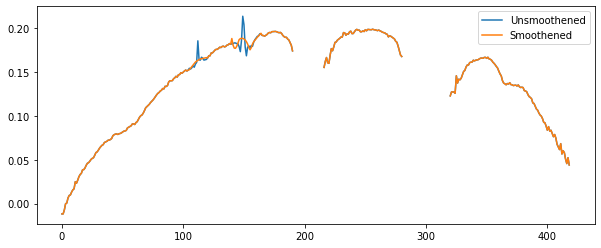

In [718]:
# Sample pixel for experiment - Kurnool India
avirisng_input = data[4600,500,:].copy()
old_copy = avirisng_input.copy()
savgol_smoothening([avirisng_input])
new_copy = avirisng_input.copy()
np.savetxt('C:\\Users\\vpatro\\Desktop\\avirisng_input.txt', avirisng_input)
remove_bad_bands([new_copy, old_copy])
plt.figure(figsize = (10,4))
plt.plot(old_copy, label = 'Unsmoothened')
plt.plot(new_copy, label = 'Smoothened')
plt.legend()